# Data Analysis Projest Life Cycle
- **Business Problem Understanding**
- **Data Collection**
- **Data Pre-processing**
- **Exploratory Data Analysis**
- **Reporting**

## Business Problem
**We need to analyze flight fare data to understand and uncover patterns in airfare prices. By analyzing historical data to give answers of questions like factors affecting prices,booking timing,etc**

## Data Collection
- Link: https://drive.google.com/file/d/1n9FqH3D1-nvviwvktEZeW4cgEPacGuRe/view?usp=drive_link

In [1]:
#importing libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#load the data,copy the data and check shape
data=pd.read_csv('Flight_Data.csv',low_memory=False)
df=data.copy()
df.shape

(301206, 13)

### Data Pre-Processing
- **Data profilling**
- **Data cleaning**
- **Data consistency**
- **Data Formating**
- **Outlier Detection & Removal**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301206 entries, 0 to 301205
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        301206 non-null  int64  
 1   airline           300754 non-null  object 
 2   flight            301206 non-null  object 
 3   source_city       301206 non-null  object 
 4   departure_time    301206 non-null  object 
 5   stops             301206 non-null  object 
 6   arrival_time      301206 non-null  object 
 7   destination_city  301206 non-null  object 
 8   class             301006 non-null  object 
 9   duration          300956 non-null  float64
 10  days_left         301206 non-null  int64  
 11  price             301106 non-null  object 
 12  date              301206 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 29.9+ MB


In [4]:
df.isna().sum() #we need to drop null values from airline,price,class,duration

Unnamed: 0            0
airline             452
flight                0
source_city           0
departure_time        0
stops                 0
arrival_time          0
destination_city      0
class               200
duration            250
days_left             0
price               100
date                  0
dtype: int64

In [5]:
null_values_percentage = (df.isna().sum()/(df.shape[0]))*100
null_values_percentage

Unnamed: 0          0.000000
airline             0.150063
flight              0.000000
source_city         0.000000
departure_time      0.000000
stops               0.000000
arrival_time        0.000000
destination_city    0.000000
class               0.066400
duration            0.083000
days_left           0.000000
price               0.033200
date                0.000000
dtype: float64

### Data Profiling
1. **Unnamed:0 & date**
    - No need,should be dropped

3. **price**
    - Need to convert in numeric value 
    - Null values has to be dropped
    - Theres is outliers which can be removed

5. **duration**
    - detect and remove outlier
    - Drop the rows corresponding to null values

7. **stops**
    - should standardize

8. **airline,class**
    - Drop the rows corresponding to null values
   

### Data Cleaning

## Unnamed: 0 & date

In [6]:
# Drop the 'Unnamed: 0' and 'date' column

df.drop(columns=['Unnamed: 0','date'], inplace=True)


## price

In [7]:
# Convert 'price' column to numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')

## stops

In [8]:
# Standardize categorical columns
df['stops'] = df['stops'].replace({'zero': 0, 'one': 1, 'two_or_more': 2})

## Drop null values from price,airline,class and duration

In [9]:
#Drop null values from price,airline,class and duration and display cleaned data 
df.dropna(subset=['price','airline','class','duration'], inplace=True)
# Display cleaned data
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 300204 entries, 0 to 301205
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300204 non-null  object 
 1   flight            300204 non-null  object 
 2   source_city       300204 non-null  object 
 3   departure_time    300204 non-null  object 
 4   stops             300204 non-null  int64  
 5   arrival_time      300204 non-null  object 
 6   destination_city  300204 non-null  object 
 7   class             300204 non-null  object 
 8   duration          300204 non-null  float64
 9   days_left         300204 non-null  int64  
 10  price             300204 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 27.5+ MB
None
    airline   flight source_city departure_time  stops   arrival_time  \
0  SpiceJet  SG-8709       Delhi        Evening      0          Night   
1  SpiceJet  SG-8157       Delhi  Early_Morning      0  

In [10]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953.0
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953.0
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956.0
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955.0
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955.0


In [11]:
#check for duplicate values 
df.duplicated().sum()

0

In [12]:
#check for null values 
df.isna().sum()


airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300204 entries, 0 to 301205
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300204 non-null  object 
 1   flight            300204 non-null  object 
 2   source_city       300204 non-null  object 
 3   departure_time    300204 non-null  object 
 4   stops             300204 non-null  int64  
 5   arrival_time      300204 non-null  object 
 6   destination_city  300204 non-null  object 
 7   class             300204 non-null  object 
 8   duration          300204 non-null  float64
 9   days_left         300204 non-null  int64  
 10  price             300204 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 27.5+ MB


### Outlier Detection and Remove

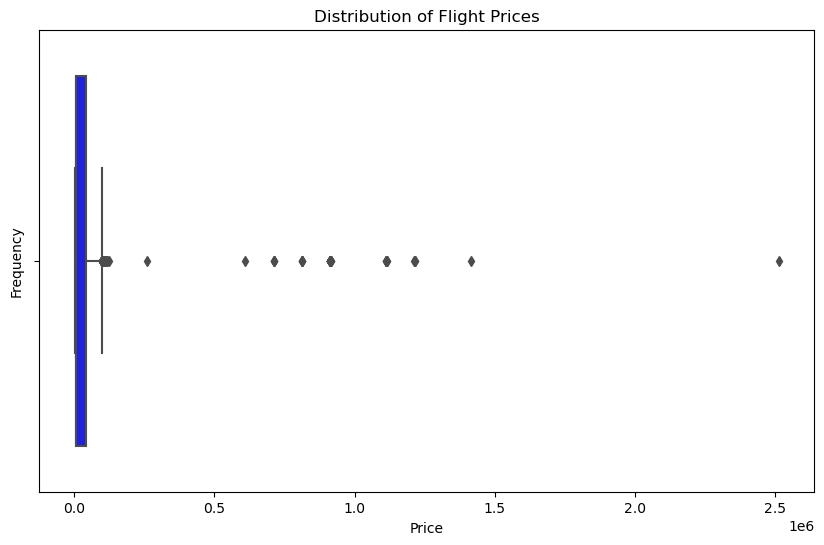

In [14]:
# Plot the distribution of flight prices
plt.figure(figsize=(10, 6))
sns.boxplot(data=df,x='price', color='blue')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [15]:
#outlier checking
q1=df['price'].quantile(0.25) 
q3=df['price'].quantile(0.75)
iqr=q3-q1
#iqr_order
lower_limit_order=q1 - 1.5*iqr
upper_limit_order=q3 + 1.5*iqr
print(lower_limit_order)
print(upper_limit_order)

-51824.0
99128.0


In [16]:
# Removing the outliers
df=df[(df['price'] > lower_limit_order) & (df['price'] < upper_limit_order)]

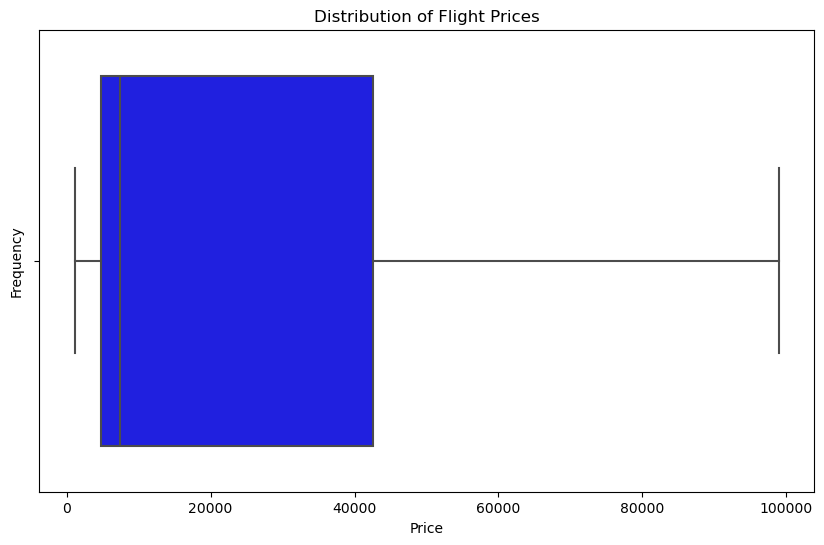

In [17]:
# Plot the distribution of flight prices
plt.figure(figsize=(10, 6))
sns.boxplot(data=df,x='price', color='blue')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## Detect and Remove outlier from duration

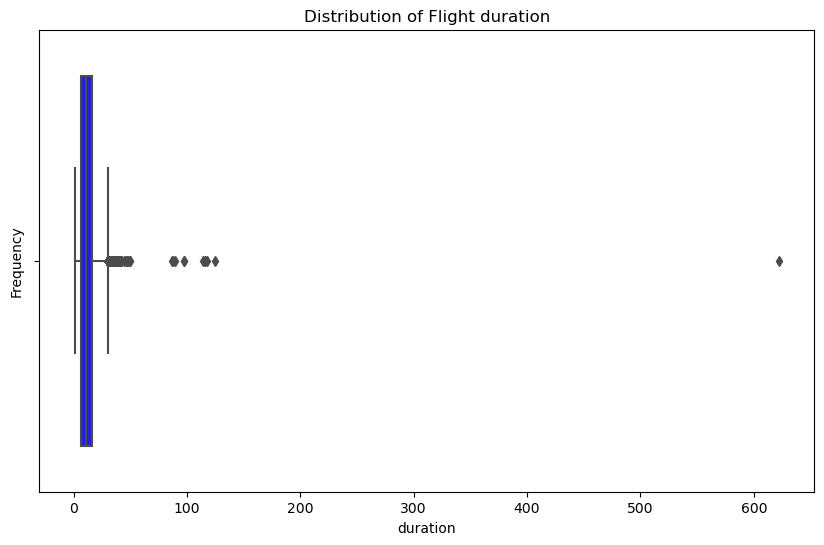

In [18]:
# Plot the distribution of flight prices
plt.figure(figsize=(10, 6))
sns.boxplot(data=df,x='duration', color='blue')
plt.title('Distribution of Flight duration')
plt.xlabel('duration')
plt.ylabel('Frequency')
plt.show()

In [19]:
#outlier checking
q1=df['duration'].quantile(0.25) 
q3=df['duration'].quantile(0.75)
iqr=q3-q1
#iqr_order
lower_limit_duration=q1 - 1.5*iqr
upper_limit_duration=q3 + 1.5*iqr
print(lower_limit_duration)
print(upper_limit_duration)

-7.1800000000000015
30.180000000000003


In [20]:
# Removing the outliers
df=df[(df['duration'] > lower_limit_duration) & (df['duration'] < upper_limit_duration)]

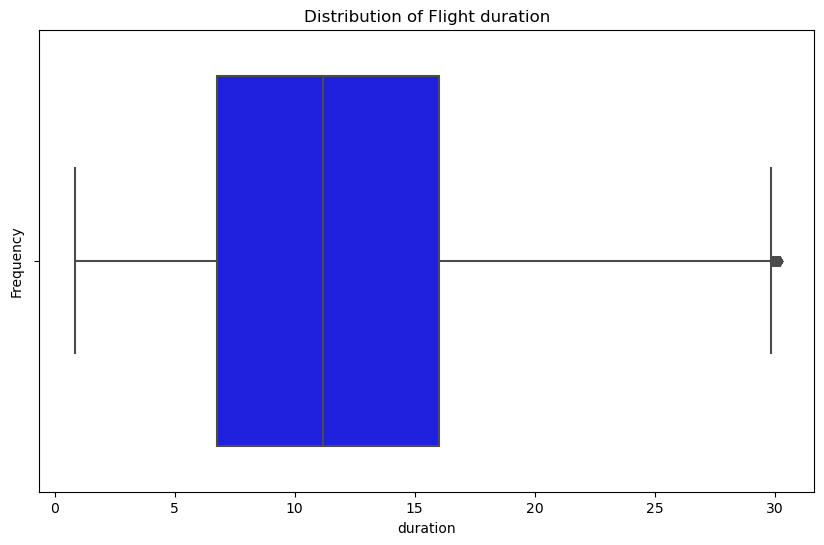

In [21]:
# Plot the distribution of flight prices
plt.figure(figsize=(10, 6))
sns.boxplot(data=df,x='duration', color='blue')
plt.title('Distribution of Flight duration')
plt.xlabel('duration')
plt.ylabel('Frequency')
plt.show()

In [22]:
#columns for check
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [23]:
#save the cleaned data
df.to_csv('Flight_cleaned_data.csv',index=False)

In [24]:
df['airline'].value_counts()

airline
Vistara      126917
Air_India     79601
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

## EDA

### Statistical Analysis

In [25]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953.0
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953.0
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956.0
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955.0
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955.0


In [26]:
df.describe()

,stops,duration,days_left,price
count,297920.000000,297920.000000,297920.000000,297920.000000
mean,0.920898,12.071699,26.039370,20882.941276
std,0.395404,6.994057,13.549647,22672.112441
min,0.000000,0.830000,1.000000,1105.000000
25%,1.000000,6.750000,15.000000,4757.000000
50%,1.000000,11.170000,26.000000,7424.000000
75%,1.000000,16.000000,38.000000,42521.000000
max,2.000000,30.170000,49.000000,98972.000000


### Data Visualization

### Distribution of Flight Prices

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


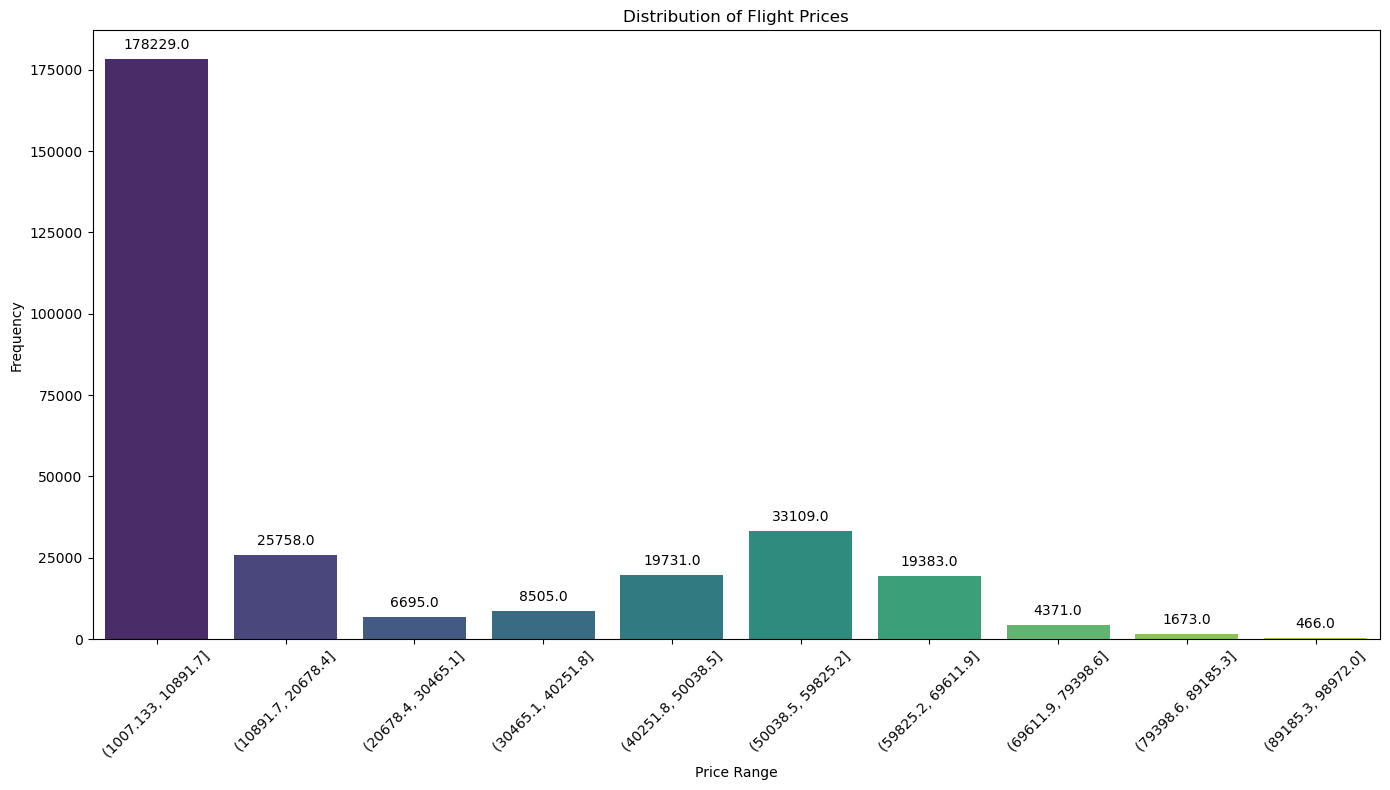

In [27]:
# Create price bins and categorize prices
price_bins = pd.cut(df['price'], bins=10)  # You can adjust the number of bins as needed

# Count the number of flights in each bin
price_distribution = price_bins.value_counts().sort_index()

# Convert to DataFrame for plotting
price_distribution_df = price_distribution.reset_index()
price_distribution_df.columns = ['Price Range', 'Frequency']

# Create the bar plot
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=price_distribution_df, x='Price Range', y='Frequency', palette='viridis')

# Customize the plot
plt.title('Distribution of Flight Prices')
plt.xlabel('Price Range')
plt.ylabel('Frequency')

# Add values at the end of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                xytext=(0, 5), 
                textcoords='offset points')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout
plt.show()

## conclusion:
The distribution of flight prices indicating that  most flights are priced lower, there are a few flights with significantly higher prices.


### Number of Flights per Airline and Average Flight Price per Airline

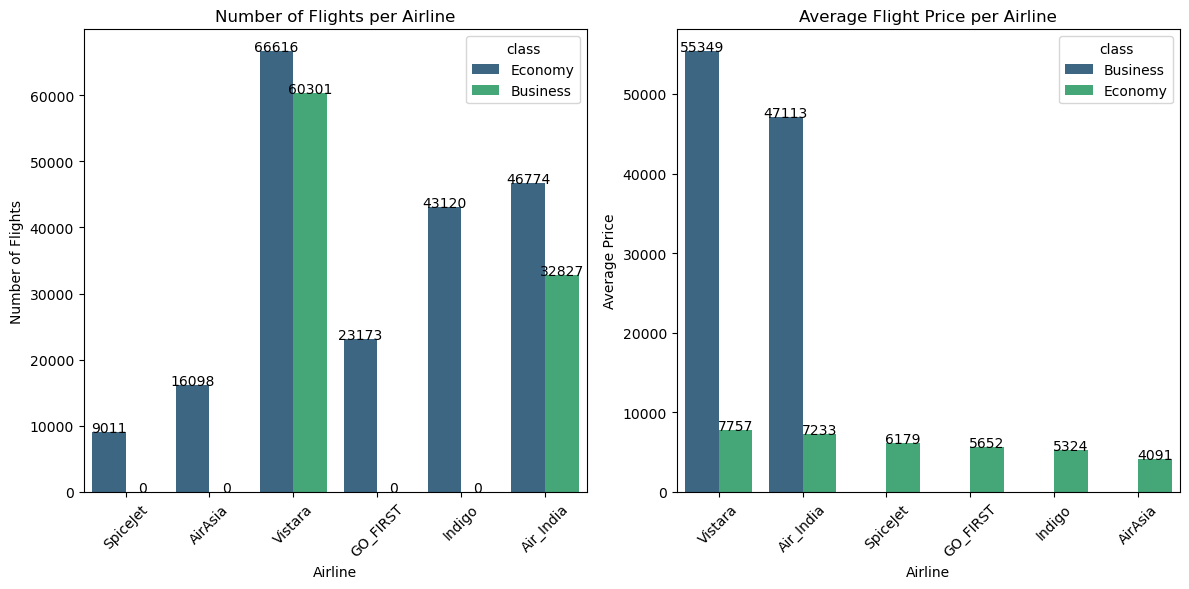

In [28]:
# Create subplots with specified figure size
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Number of Flights per Airline
sns.countplot(data=df, x='airline', palette='viridis',hue='class', ax=ax[0])
ax[0].set_title('Number of Flights per Airline')
ax[0].set_xlabel('Airline')
ax[0].set_ylabel('Number of Flights')
ax[0].tick_params(axis='x', rotation=45)
# Calculate the height of each bar and add values above bars
for p in ax[0].patches:
    height = p.get_height()
    ax[0].text(p.get_x() + p.get_width() / 2., height + 0.2, f'{int(height)}', ha='center')

# Plot 2: Average Flight Price per Airline
avg_price_per_airline = df.groupby(['airline','class'])['price'].mean().reset_index().sort_values(by='price', ascending=False)
sns.barplot(data=avg_price_per_airline, x='airline', y='price', palette='viridis',hue='class', ax=ax[1])
ax[1].set_title('Average Flight Price per Airline')
ax[1].set_xlabel('Airline')
ax[1].set_ylabel('Average Price')
ax[1].tick_params(axis='x', rotation=45)
# Calculate the height of each bar and add values above bars
for p in ax[1].patches:
    height = p.get_height()
    if not pd.isna(height):
        ax[1].text(p.get_x() + p.get_width() / 2., height + 0.2, f'{int(height)}', ha='center')

plt.tight_layout()  # Adjust layout
plt.show()

### conclusion:
Vistara has the highest number of flights  in economy class making it the most frequent airline in the dataset. Vistara and Air India have the highest average flight prices on business class suggesting a focus on premium pricing strategies.Economy class flights are cheaper compare to business class.


## Total no of Flight From Each Source City

In [29]:
df['source_city'].value_counts() # total no of flight from each source city

source_city
Delhi        61156
Mumbai       60683
Bangalore    51548
Kolkata      45841
Hyderabad    40636
Chennai      38056
Name: count, dtype: int64

### Average Flight Duration per Airline

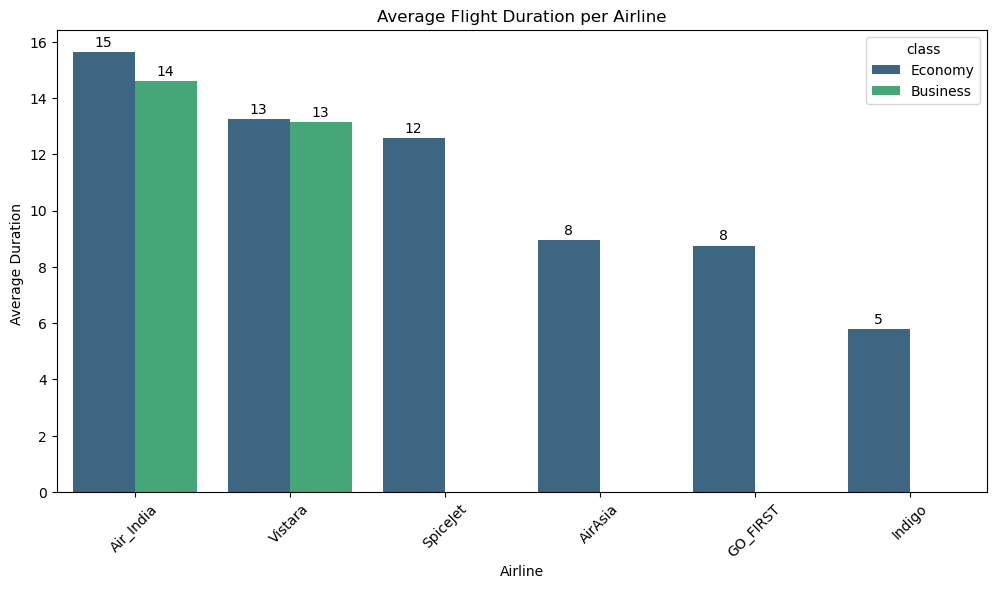

In [30]:
# Plot the average flight duration per airline
plt.figure(figsize=(12, 6))
avg_duration_per_airline = df.groupby(['airline','class'])['duration'].mean().reset_index().sort_values(by='duration', ascending=False)
sns.barplot(data=avg_duration_per_airline, x='airline', y='duration',hue='class', palette='viridis')
plt.title('Average Flight Duration per Airline')
plt.xlabel('Airline')
plt.ylabel('Average Duration ')
plt.xticks(rotation=45)
# Calculate the height of each bar and add values above bars
for p in plt.gca().patches:
    height = p.get_height()
    if not pd.isna(height):
        plt.text(p.get_x() + p.get_width() / 2., height + 0.2, f'{int(height)}', ha='center')
plt.show()

## conclusion:
Some airlines have significantly longer flights on economy class while others are much shorter (e.g., GO-FIRST with 8 and Indigo with 5 unit of time).


### Number of Flights per Class and Average Flight Price per Class

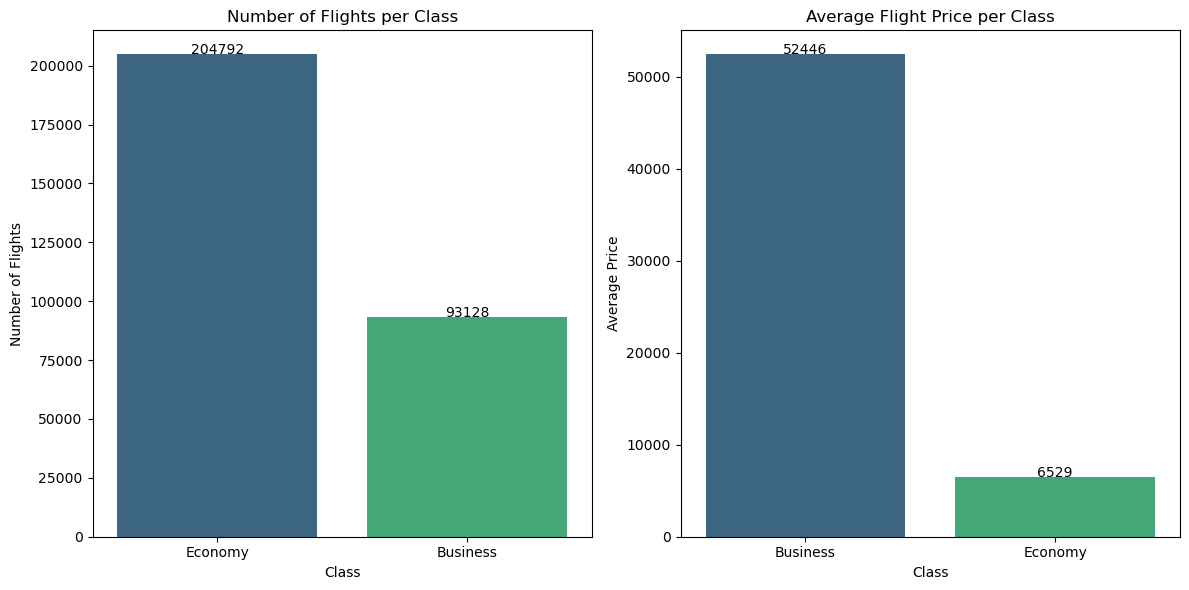

In [31]:
# Create subplots with specified figure size
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Number of Flights per Class
sns.countplot(data=df, x='class', palette='viridis', ax=ax[0])
ax[0].set_title('Number of Flights per Class')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Number of Flights')
# Calculate the height of each bar and add values above bars
for p in ax[0].patches:
    height = p.get_height()
    ax[0].text(p.get_x() + p.get_width() / 2., height + 0.2, f'{int(height)}', ha='center')

# Plot 2: Average Flight Price per Class
avg_price_per_class = df.groupby('class')['price'].mean().reset_index()
sns.barplot(data=avg_price_per_class, x='class', y='price', palette='viridis', ax=ax[1])
ax[1].set_title('Average Flight Price per Class')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Average Price')
# Calculate the height of each bar and add values above bars
for p in ax[1].patches:
    height = p.get_height()
    ax[1].text(p.get_x() + p.get_width() / 2., height + 0.2, f'{int(height)}', ha='center')

plt.tight_layout()  # Adjust layout
plt.show()

## conclusion:
Economy class has a significantly higher number of flights (204,792) compared to Business class (93,128).But Business class has a higher average price (52,446) than Economy class (6529).


### Number of Stops Per Flight and Average Flight Price Per Number of Stops

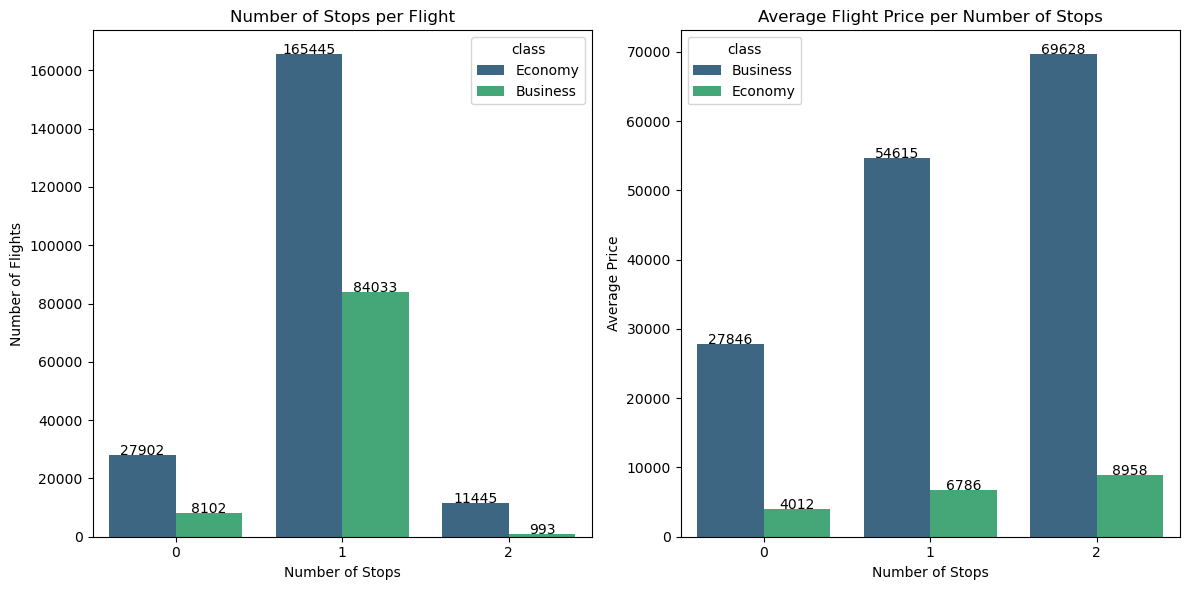

In [32]:
# Create subplots with specified figure size
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Number of Stops per Flight
sns.countplot(data=df, x='stops', palette='viridis', hue='class',ax=ax[0])
ax[0].set_title('Number of Stops per Flight')
ax[0].set_xlabel('Number of Stops')
ax[0].set_ylabel('Number of Flights')
# Calculate the height of each bar and add values above bars
for p in ax[0].patches:
    height = p.get_height()
    ax[0].text(p.get_x() + p.get_width() / 2., height + 0.2, f'{int(height)}', ha='center')

# Plot 2: Average Flight Price per Number of Stops
avg_price_per_stops = df.groupby(['stops','class'])['price'].mean().reset_index()
sns.barplot(data=avg_price_per_stops, x='stops', y='price', palette='viridis',hue='class', ax=ax[1])
ax[1].set_title('Average Flight Price per Number of Stops')
ax[1].set_xlabel('Number of Stops')
ax[1].set_ylabel('Average Price')
# Calculate the height of each bar and add values above bars
for p in ax[1].patches:
    height = p.get_height()
    ax[1].text(p.get_x() + p.get_width() / 2., height + 0.2, f'{int(height)}', ha='center')

plt.tight_layout()  # Adjust layout
plt.show()

## conclusion:
Most flights in economy have either 1 stop or no stops . A smaller number of flights have 2 stops. Flights with 2 stop tend to be the most expensive .Flights with 1 stops are cheaper than 2 stop flights but still pricier than direct flights in business class.Economy class 0 stop flights are cheaper compared to other.


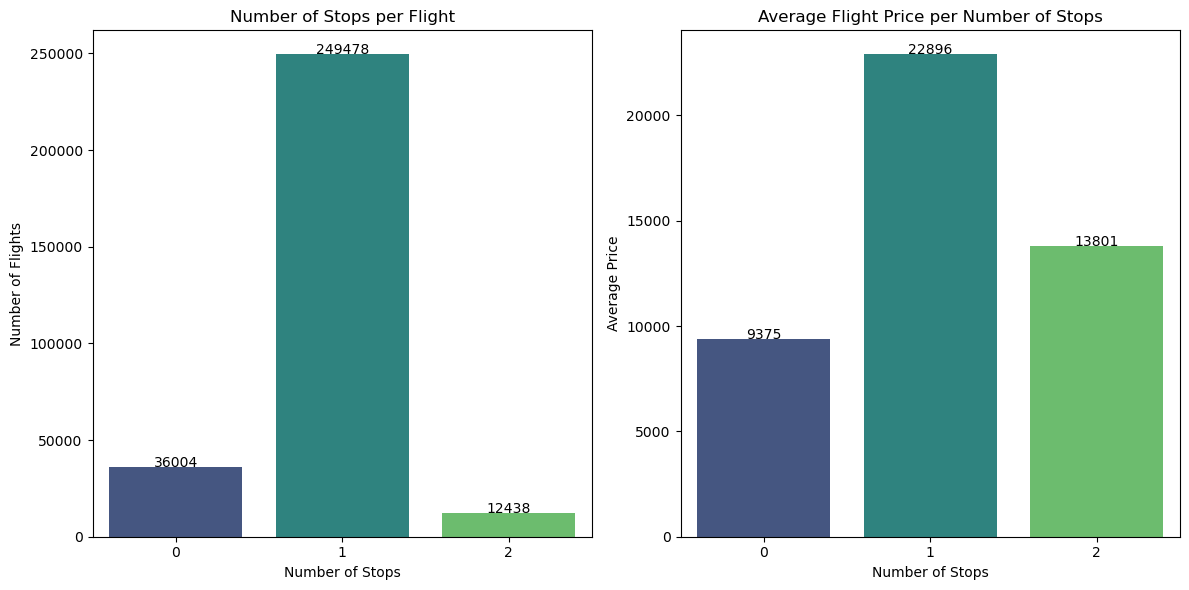

In [34]:
# Create subplots with specified figure size
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Number of Stops per Flight
sns.countplot(data=df, x='stops', palette='viridis',ax=ax[0])
ax[0].set_title('Number of Stops per Flight')
ax[0].set_xlabel('Number of Stops')
ax[0].set_ylabel('Number of Flights')
# Calculate the height of each bar and add values above bars
for p in ax[0].patches:
    height = p.get_height()
    ax[0].text(p.get_x() + p.get_width() / 2., height + 0.2, f'{int(height)}', ha='center')

# Plot 2: Average Flight Price per Number of Stops
avg_price_per_stops = df.groupby('stops')['price'].mean().reset_index()
sns.barplot(data=avg_price_per_stops, x='stops', y='price', palette='viridis', ax=ax[1])
ax[1].set_title('Average Flight Price per Number of Stops')
ax[1].set_xlabel('Number of Stops')
ax[1].set_ylabel('Average Price')
# Calculate the height of each bar and add values above bars
for p in ax[1].patches:
    height = p.get_height()
    ax[1].text(p.get_x() + p.get_width() / 2., height + 0.2, f'{int(height)}', ha='center')

plt.tight_layout()  # Adjust layout
plt.show()

## Check How Price Change With Change in Source to Destination

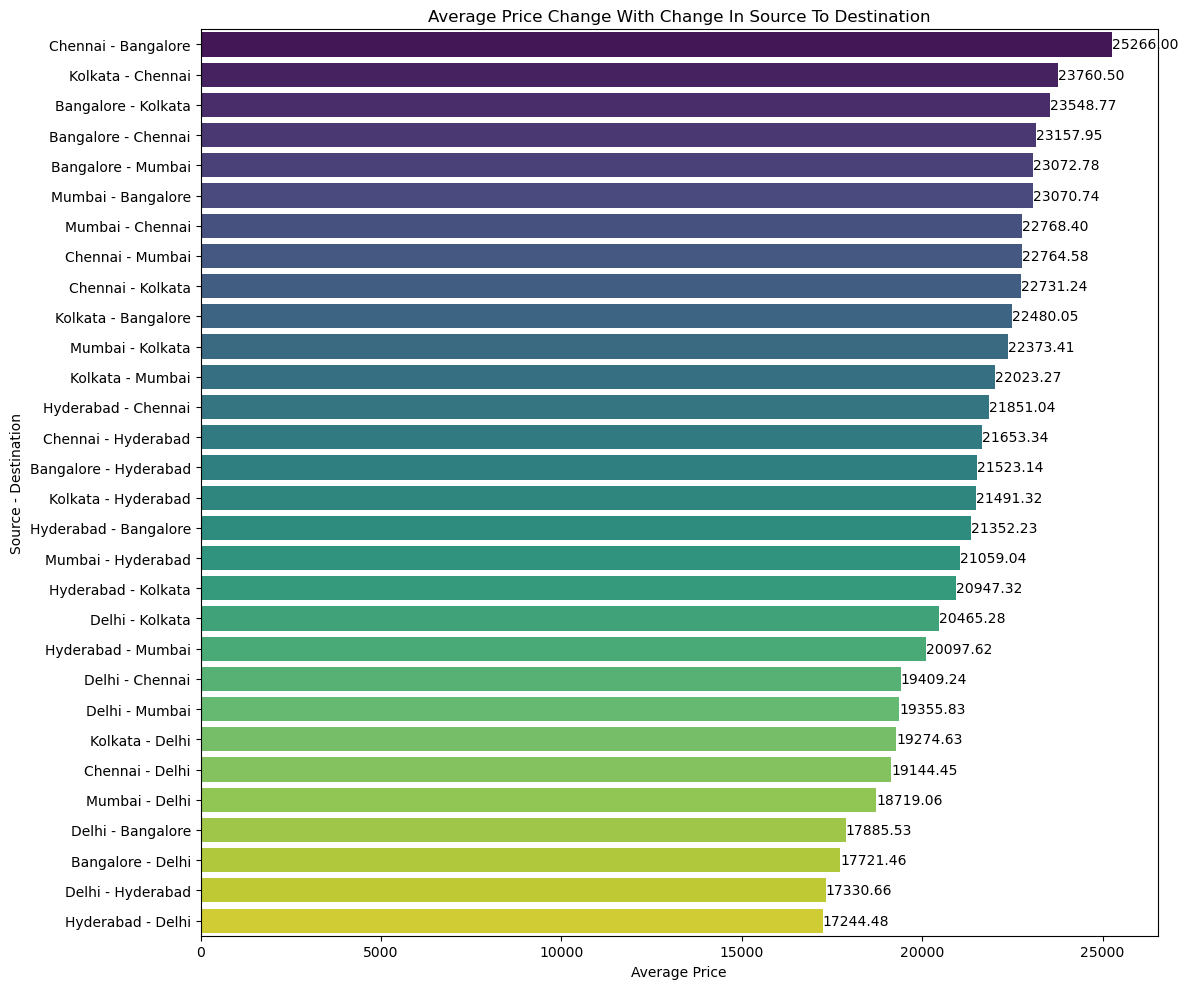

In [35]:
# Create a new column combining source and destination cities
df['source_to_destination'] = df['source_city'] + ' - ' + df['destination_city']

# Calculate the average price for each source-to-destination pair
avg_price_per_route = df.groupby('source_to_destination')['price'].mean().reset_index()

# Sort the DataFrame by average price in descending order
avg_price_per_route_sorted = avg_price_per_route.sort_values(by='price', ascending=False)

# Create the plot
plt.figure(figsize=(12, 10))
sns.barplot(data=avg_price_per_route_sorted, y='source_to_destination', x='price', palette='viridis')

# Customize the plot
plt.title('Average Price Change With Change In Source To Destination')
plt.xlabel('Average Price')
plt.ylabel('Source - Destination')

# Add values above bars
for p in plt.gca().patches:
    width = p.get_width()
    plt.text(width + 0.5, p.get_y() + p.get_height() / 2., f'{width:.2f}', ha='left', va='center')

plt.tight_layout()  # Adjust layout
plt.show()

## conclusion:
chennai to bangalore flights are most expensive flights compare to other source city to destination city flights. 

### Analyze How Price Varies With Departure time and Arrival time

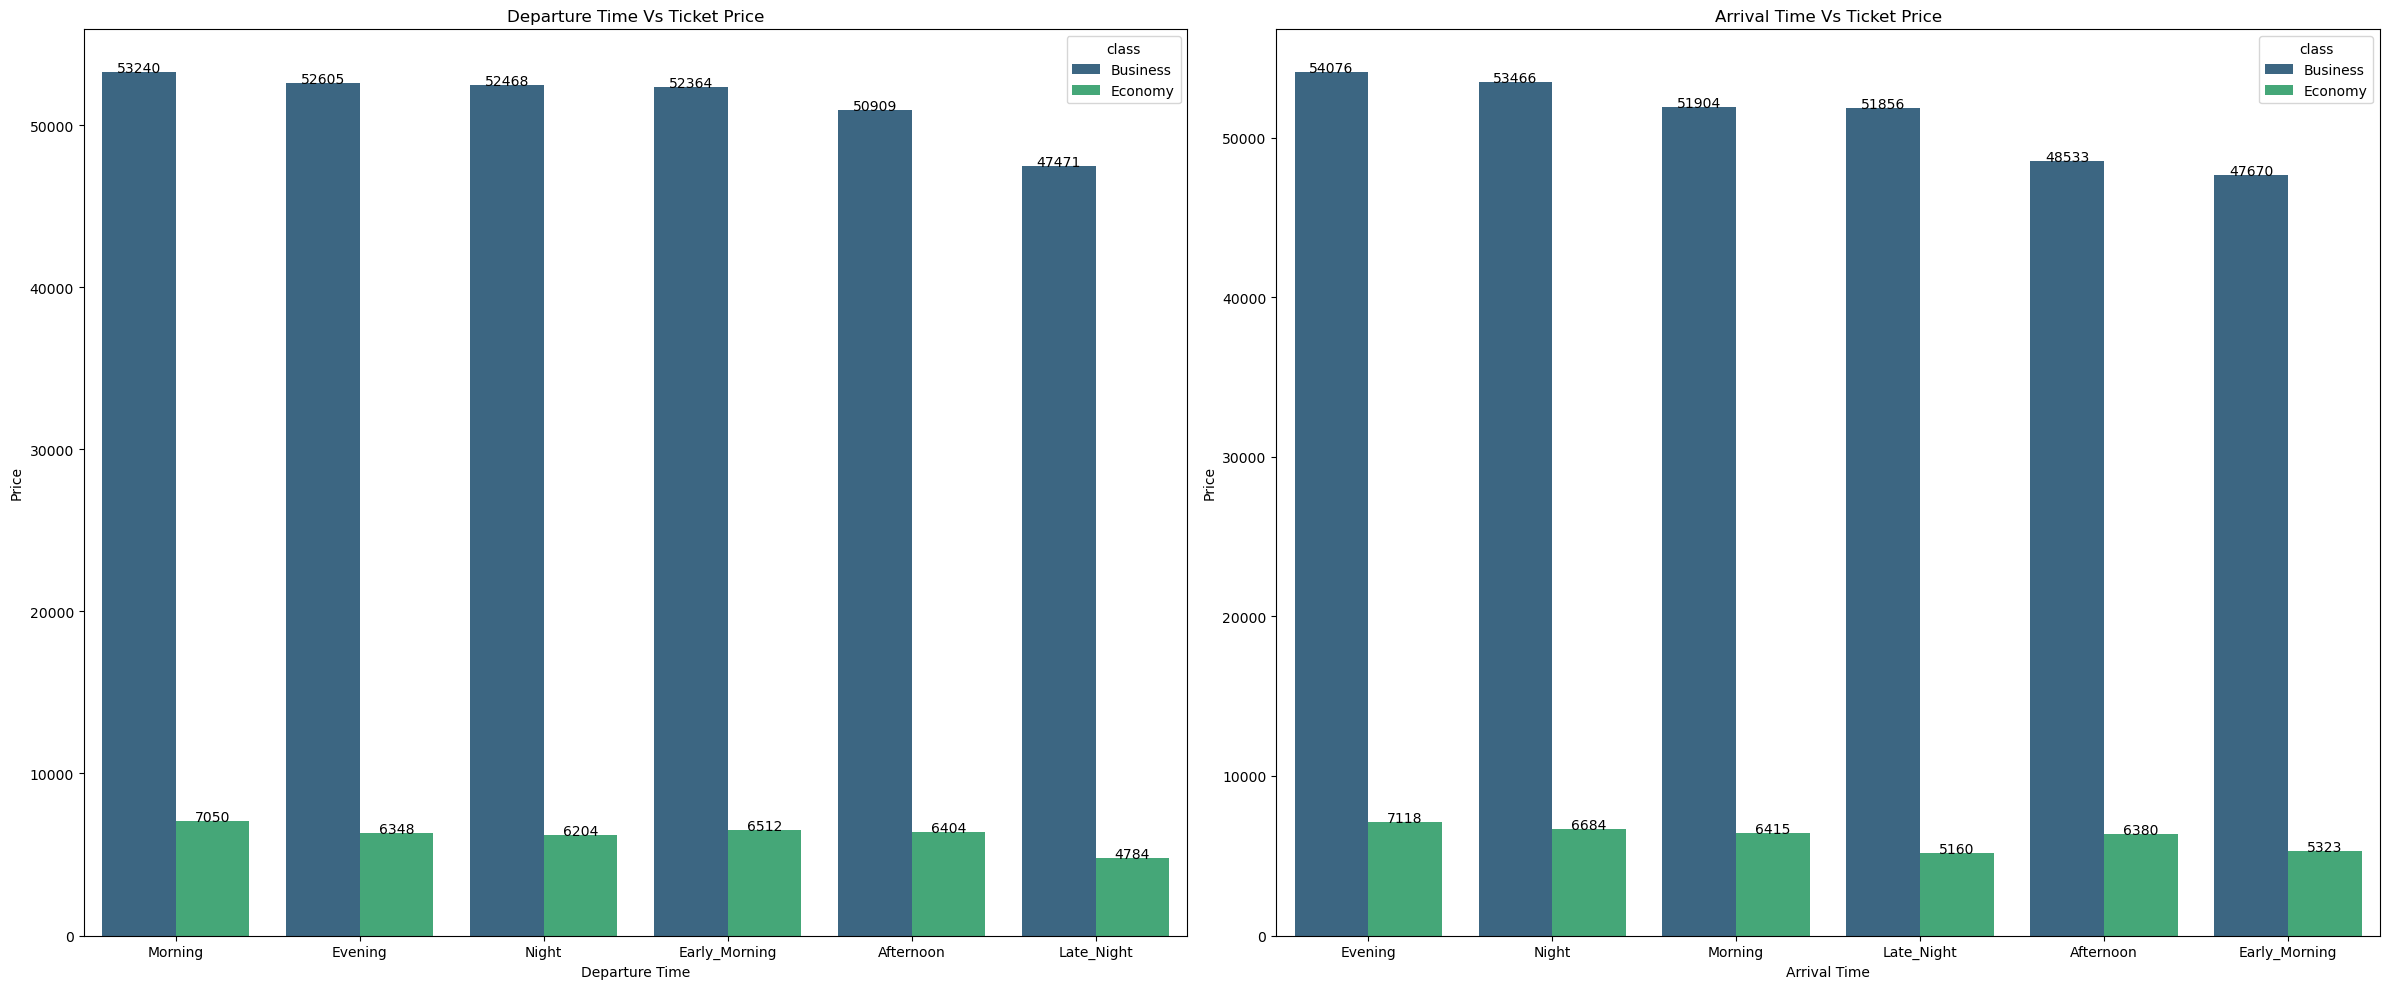

In [36]:
data_dep_sorted = df.groupby(['departure_time','class'], as_index=False)['price'].mean().sort_values(by='price',ascending=False)
data_arr_sorted = df.groupby(['arrival_time','class'], as_index=False)['price'].mean().sort_values(by='price',ascending=False)

# Create figure with specified size
plt.figure(figsize=(24, 10))

# First subplot: Departure Time Vs Ticket Price
plt.subplot(1, 2, 1)
sns.barplot(x='departure_time', y='price', data=data_dep_sorted,hue='class', palette='viridis')
plt.title('Departure Time Vs Ticket Price')
plt.xlabel('Departure Time')
plt.ylabel('Price')
# Display bar values in sorted order
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 5, f'{int(height)}', ha='center')

# Second subplot: Arrival Time Vs Ticket Price
plt.subplot(1, 2, 2)
sns.barplot(x='arrival_time', y='price', data=data_arr_sorted,hue='class', palette='viridis')
plt.title('Arrival Time Vs Ticket Price')
plt.xlabel('Arrival Time')
plt.ylabel('Price')
# Display bar values in sorted order
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 5, f'{int(height)}', ha='center')

plt.tight_layout()  # Adjust layout
plt.show()

## conclusion:
The graph comparing departure times with total prices shows that morning flights tend to be the most expensive, followed by evening , night,early morning flights in business class.Afternoon and late night flights have a lower price in business class.
The graph comparing arrival times with total prices reveals  evening flights are associated with higher prices, followed bynightg arrivalsEarly morningt arrivals are the least expensiv in business class.Economy class flights are cheap.e

## Days Left For Departure v/s Price

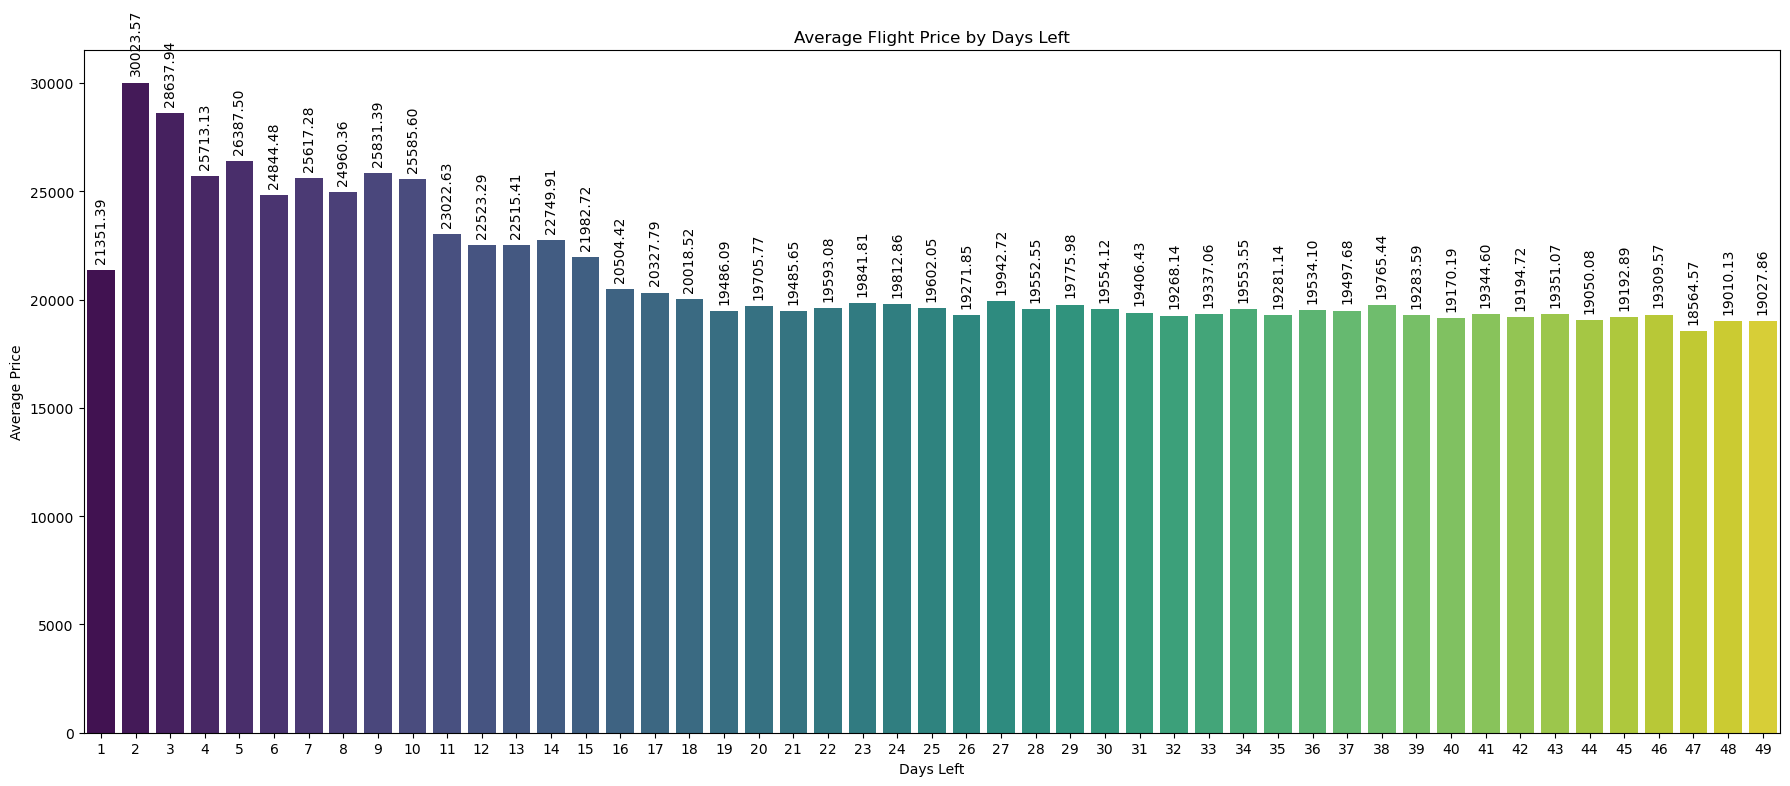

In [38]:
avg_price_per_days_left = df.groupby('days_left', as_index=False)['price'].mean()
avg_price_per_days_left_sorted = avg_price_per_days_left.sort_values(by='price', ascending=True)

# Create the plot
plt.figure(figsize=(18, 8))
ax = sns.barplot(data=avg_price_per_days_left_sorted, x='days_left', y='price', palette='viridis')

# Customize the plot
plt.title('Average Flight Price by Days Left')
plt.ylabel('Average Price')
plt.xlabel('Days Left')

# Add values at the end of bars with a 90-degree rotation
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                xytext=(0, 5), 
                textcoords='offset points', 
                rotation=90)

plt.tight_layout()  # Adjust layout
plt.show()

## conclusion:
When there are many days left before departure, prices are low in that time. However, prices are increases as the departure date gets very close.


### Flight Duration v/s Price

C:\Users\arnab\AppData\Local\Temp\ipykernel_8144\2852080064.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_per_bin = df.groupby(['duration_bin','class'])['price'].mean().reset_index()
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt t

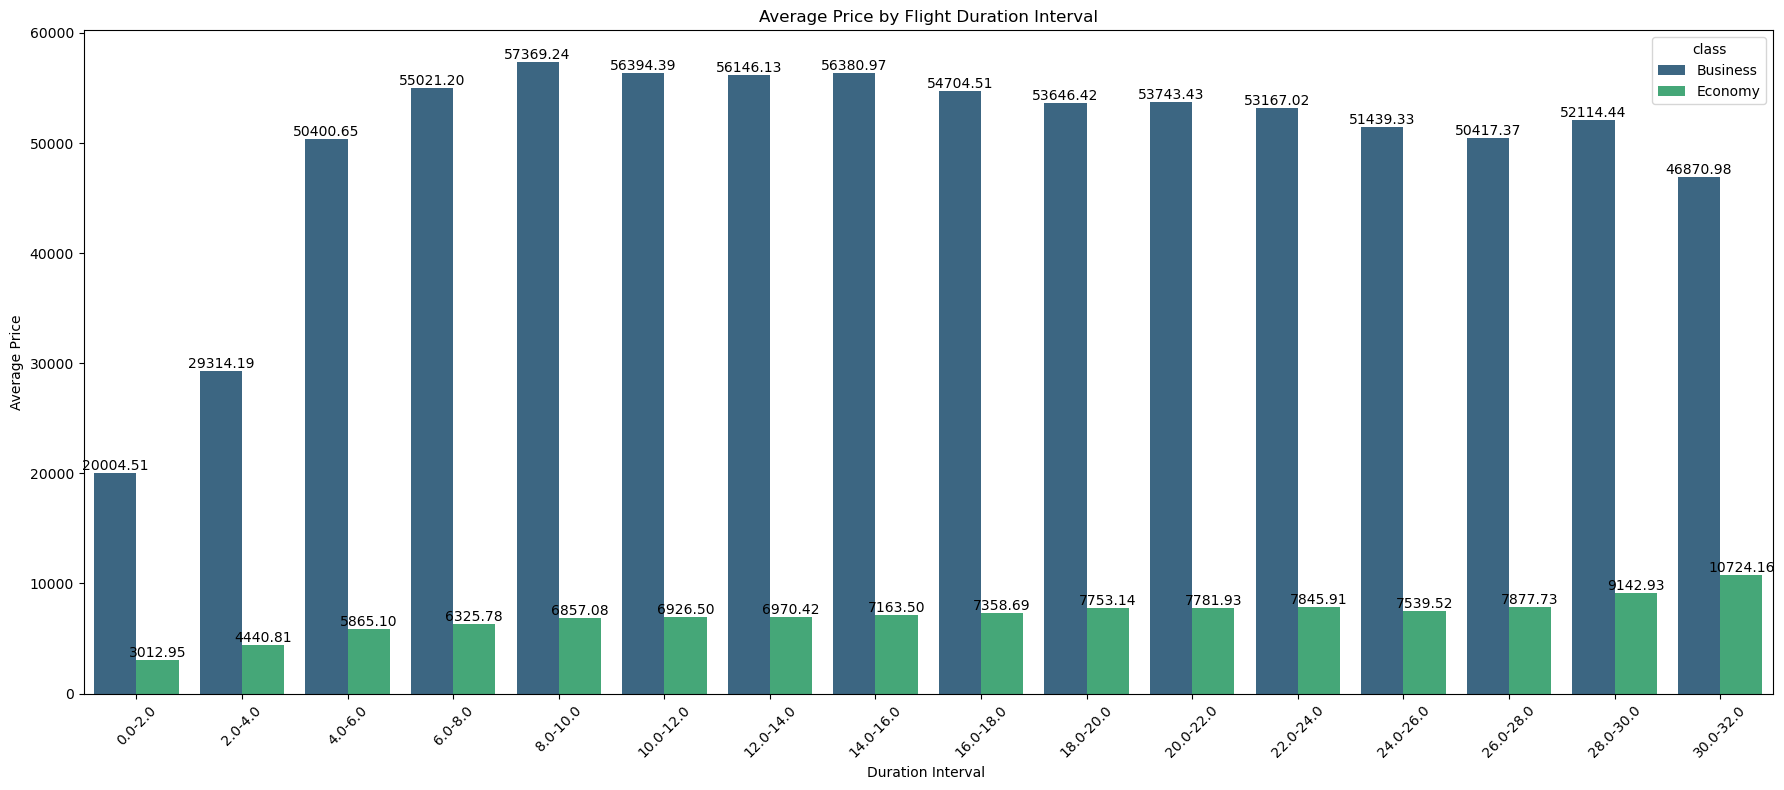

In [40]:
# Define duration bins and labels for 10-minute intervals
bin_edges = np.arange(0, df['duration'].max() + 2, 2)  # Creating bins of 10-minute intervals
bin_labels = [f'{edge}-{edge+2}' for edge in bin_edges[:-1]]

# Add a new column for duration bins
df['duration_bin'] = pd.cut(df['duration'], bins=bin_edges, labels=bin_labels, right=False)

# Calculate average price for each duration bin
avg_price_per_bin = df.groupby(['duration_bin','class'])['price'].mean().reset_index()

# Sort by duration bin for better visual representation
avg_price_per_bin_sorted = avg_price_per_bin.sort_values(by='duration_bin')

# Create the bar plot
plt.figure(figsize=(18, 8))  # Increased figure size for better readability
sns.barplot(data=avg_price_per_bin_sorted, x='duration_bin', y='price', hue='class',palette='viridis')

# Customize the plot
plt.title('Average Price by Flight Duration Interval')
plt.xlabel('Duration Interval ')
plt.ylabel('Average Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add values above bars
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 0.5, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to fit labels
plt.show()

## conclusion:
Ticket prices tend to be lower for shorter economy class flights.For budget-conscious travelers, Economy class remains a more viable option, especially for longer durations where the price increase is more moderate.
Business travelers or those seeking premium services might expect a peak in prices around mid-range duration  and should plan accordingly.
